# Attention Mechanisms

Combinatorial problems are class of problems in which the decision variables are discrete -i.e. where the solution is a set (combination), or a sequence (permutation), of integers or other discrete objects {cite}`reeves_1995`. In the context of smart mobility, many problems have solutions in forms of permutation such as vehicle routing, dispatching, scheduling and trip planning to name just a few. For example, in a discrete combinatorial optimization problem like travelling salesman, both input and output are sequential data. In these problems, sequence-to-sequence (Seq2Seq) modelling can be applied. A Seq2Seq model is a model that takes a sequence of items (candidate solution for cities to be visited in a TSP problem for example) and outputs another sequence of items (sequence of cities to be visited to get the shortest/fastest route). Recurrent Neural Networks and long short-term memory (LSTM) have been established as state-of-the-art approaches in sequence-to-sequence modelling. However, if the sequence is very long (e.g., large number of cities to be visited), RNN and LSTM may suffer from forgetting problem where initial context can be lost by the end of the sequence. To deal with this problem, attention mechanisms have been introduced {cite}`bahdanau2016neural`. Attention allows the model to focus on different parts of the input sequence at every stage of the output sequence allowing the context to be preserved from beginning to end. In attention mechanisms, a vector of importance weights is used in order to estimate how strongly an element in the sequence is correlated with (or “attends to”) other elements. The sum of the elements’ values is taken weighted by the attention vector as the approximation of the target as illustrated below.

![](../../images/Learn2Search/Attention.png)

$\alpha_i$ represents the weight vector that is function of query and key. Every value has an associate key. If the key is the value itself, it’s called self-attention. For example, the following function can be used to calculate the weights:<br><br>
$\{\alpha_i\}^N_{i=1} = \text{softmax}(\{tanh(q^Tk_i)\}^N_{i=1})$

Unfortunately, discrete combinatorial optimization problems cannot be easily solved by classic seq-2-seq models, given that the discrete categories of output elements are not determined in advance, but depends on the variable input size (e.g., output dictionary depends on the input length). For example, in vector maps, convex hull is commonly used to find the smallest polygon containing all the points. The following code can be used to generate the polygon/convex hull of UofT Mississauga Campus.

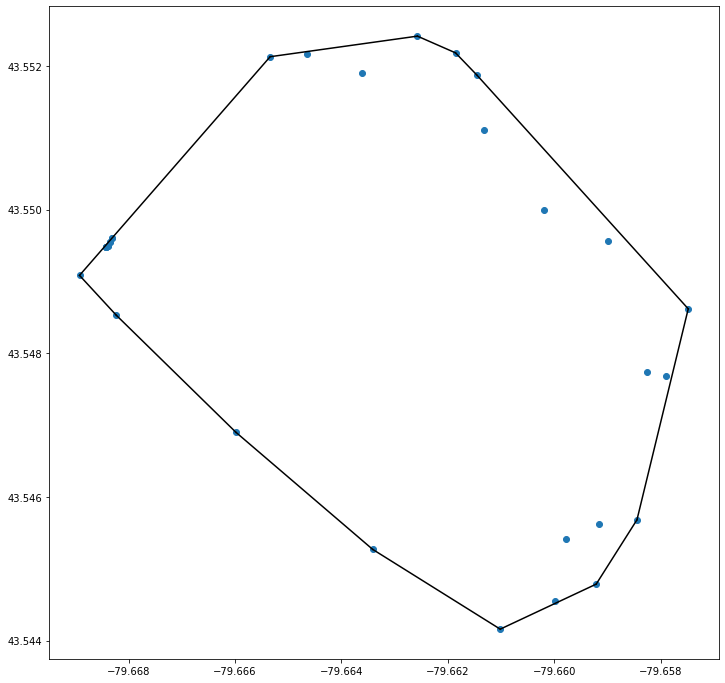

In [4]:
from numpy import genfromtxt
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import matplotlib.pyplot as plt 

# Mississauga campus
points = genfromtxt('../../data/convex_hull/points.csv', delimiter=',')
hull = ConvexHull(points)

# plot pointx and convex hull
plt.subplots(figsize=(12, 12))
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')


In this problem, the output elements (i.e., points to be included in the polygon) are not determined in advance, but depends on the variable input size. Pointer Network (Ptr-Net) uses attention as a pointer to select a member of the input sequence as the output and allows us to generalize to variable size output dictionaries {cite}`vinyals2017pointer`. Ptr-Net takes a sequence of input vectors as input, encodes and decodes hidden states using RNNs and finally produces a sequence of integer indices as output. The Ptr-Net applies additive attention between states and then normalizes it by softmax to model the output conditional probability.


## Resources
- [Pointer Networks](https://github.com/jojonki/Pointer-Networks)
- [TensorFlow-Pointer-Networks](https://github.com/ikostrikov/TensorFlow-Pointer-Networks)
- [TSP using Pointer Networks and RL](https://github.com/qiang-ma/graph-pointer-network)